In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
enrollment = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/data/12-Month Enrollment/EFFY_2015-2021_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
enrollment.head(-5)

,unitid,effyalev,effylev,lstudy,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
0,100654,All students total,All students total,Generated total,6628,2560,4068,18,8,10,...,83,28,55,579,198,381,90,43,47,2021
1,100654,"All students, Undergraduate total",Undergraduate,Undergraduate,5529,2215,3314,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
2,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,5517,2210,3307,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
3,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,1632,677,955,5,2,3,...,32,11,21,70,39,31,5,3,2,2021
4,100654,"All students, Undergraduate, Other degree/cert...","Not applicable, undergraduate detail",Undergraduate,3885,1533,2352,10,5,5,...,48,16,32,188,64,124,35,16,19,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284162,487630,NaN,Undergraduate,Undergraduate,49,17,32,0,0,0,...,0,0,0,6,2,4,0,0,0,2015
284163,487649,NaN,All students total,Generated total,18,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
284164,487649,NaN,Graduate,Graduate,18,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
284165,487658,NaN,All students total,Generated total,40,37,3,0,0,0,...,0,0,0,1,1,0,0,0,0,2015


In [5]:
enrollment['lstudy'].value_counts()

Undergraduate      223320
Generated total     46146
Graduate            14706
Name: lstudy, dtype: int64

In [6]:
enrollment = enrollment[enrollment['lstudy'] == 'Generated total']

In [7]:
enrollment = enrollment.loc[:, ['unitid', 'efytotlt', 'efytotlm', 'efytotlw', 'efyaiant', 'efyasiat','efybkaat','efyhispt','efynhpit','efywhitt','efy2mort','efyunknt','efynralt', 'year']]
enrollment.head()

,unitid,efytotlt,efytotlm,efytotlw,efyaiant,efyasiat,efybkaat,efyhispt,efynhpit,efywhitt,efy2mort,efyunknt,efynralt,year
0,100654,6628,2560,4068,18,15,5638,63,4,138,83,579,90,2021
22,100663,26327,9622,16705,67,1615,5644,1180,9,15150,937,436,1289,2021
45,100690,1087,450,637,7,13,604,32,4,401,0,26,0,2021
64,100706,11318,6303,5015,90,421,1084,590,19,7703,400,614,397,2021
87,100724,4478,1626,2852,9,13,4010,57,8,198,61,57,65,2021


In [8]:
enrollment['Total'] = enrollment['efytotlt']
enrollment['Male'] = enrollment['efytotlm']
enrollment['Female'] = enrollment['efytotlw']
enrollment['American Indian'] = enrollment['efyaiant']
enrollment['Asian'] = enrollment['efyasiat']
enrollment['Black'] = enrollment['efybkaat']
enrollment['Hispanic'] = enrollment['efyhispt']
enrollment['Hawaiian/Pacific Islander'] = enrollment['efynhpit']
enrollment['White'] = enrollment['efywhitt']
enrollment['2 Or More Races'] = enrollment['efy2mort']
enrollment['Unknown'] = enrollment['efyunknt']
enrollment['Nonresident Alien'] = enrollment['efynralt']

In [9]:
enrollment = enrollment.drop(columns = ['efytotlt', 'efytotlm', 'efytotlw', 'efyaiant', 'efyasiat','efybkaat','efyhispt','efynhpit','efywhitt','efy2mort','efyunknt','efynralt'])

In [10]:
enrollment = enrollment[enrollment['year'] != 2021]
enrollment.head()

,unitid,year,Total,Male,Female,American Indian,Asian,Black,Hispanic,Hawaiian/Pacific Islander,White,2 Or More Races,Unknown,Nonresident Alien
103604,100654,2020,6560,2527,4033,15,14,5699,51,6,132,70,481,92
103627,100663,2020,25843,9576,16267,57,1551,5528,1094,5,14994,896,386,1332
103650,100690,2020,1079,422,657,5,6,664,30,2,348,0,24,0
103669,100706,2020,11312,6236,5076,114,402,1044,562,21,7747,347,613,462
103692,100724,2020,4640,1711,2929,10,18,4181,48,4,198,53,57,71


In [11]:
enrollment['%Male'] = enrollment['Male']/enrollment['Total']
enrollment['%Female'] = enrollment['Female']/enrollment['Total']
enrollment['%American Indian'] = enrollment['American Indian']/enrollment['Total']
enrollment['%Asian'] = enrollment['Asian']/enrollment['Total']
enrollment['%Black'] = enrollment['Black']/enrollment['Total']
enrollment['%Hispanic'] = enrollment['Hispanic']/enrollment['Total']
enrollment['%Hawaiian/Pacific Islander'] = enrollment['Hawaiian/Pacific Islander']/enrollment['Total']
enrollment['%White'] = enrollment['White']/enrollment['Total']
enrollment['%2 Or More Races'] = enrollment['2 Or More Races']/enrollment['Total']
enrollment['%Nonresident Alien'] = enrollment['Nonresident Alien']/enrollment['Total']

In [12]:
enrollment = enrollment.drop(columns = ['Male', 'Female', 'American Indian', 'Asian', 'Black','Hispanic','Hawaiian/Pacific Islander','White','2 Or More Races','Unknown','Nonresident Alien'])

In [13]:
enrollment.head(-5)

,unitid,year,Total,%Male,%Female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,%2 Or More Races,%Nonresident Alien
103604,100654,2020,6560,0.385213,0.614787,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,0.010671,0.014024
103627,100663,2020,25843,0.370545,0.629455,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,0.034671,0.051542
103650,100690,2020,1079,0.391103,0.608897,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,0.000000,0.000000
103669,100706,2020,11312,0.551273,0.448727,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,0.030675,0.040842
103692,100724,2020,4640,0.368750,0.631250,0.002155,0.003879,0.901078,0.010345,0.000862,0.042672,0.011422,0.015302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284149,487506,2015,35,0.000000,1.000000,0.028571,0.085714,0.000000,0.000000,0.000000,0.885714,0.000000,0.000000
284151,487524,2015,3760,0.442287,0.557713,0.004787,0.021809,0.042553,0.012766,0.002394,0.866489,0.011968,0.026596
284154,487588,2015,492,0.042683,0.957317,0.010163,0.002033,0.737805,0.010163,0.000000,0.217480,0.020325,0.002033
284156,487603,2015,818,0.531785,0.468215,0.013447,0.051345,0.069682,0.103912,0.018337,0.553790,0.042787,0.000000


In [14]:
grad_rates = pd.read_csv('/content/drive/MyDrive/Data Open Championship 2022/data/Completions/C_B_2015-2021_data.csv')

In [15]:
grad_rates.head()

,unitid,cstotlt,cstotlm,cstotlw,csaiant,csaianm,csaianw,csasiat,csasiam,csasiaw,...,cswhitw,cs2mort,cs2morm,cs2morw,csunknt,csunknm,csunknw,csnralt,csnralm,year
0,100654,821,264,557,2,0,2,1,1,0,...,14,11,4,7,77,17,60,20,9,2021
1,100663,6039,2109,3930,16,4,12,374,139,235,...,2348,205,59,146,98,45,53,353,193,2021
2,100690,217,83,134,1,0,1,1,0,1,...,34,0,0,0,6,3,3,0,0,2021
3,100706,2222,1145,1077,24,9,15,95,49,46,...,759,38,20,18,64,12,52,94,63,2021
4,100724,652,216,436,0,0,0,5,3,2,...,33,9,4,5,11,5,6,10,7,2021


In [16]:
grad_rates = grad_rates.loc[:, ['unitid', 'cstotlt', 'cstotlm', 'cstotlw', 'csaiant', 'csasiat', 'csbkaat', 'cshispt', 'csnhpit', 'cswhitt', 'cs2mort', 'csunknt', 'csnralt', 'year']]

In [17]:
grad_rates['Total Graduated'] = grad_rates['cstotlt']
grad_rates['Men Graduated'] = grad_rates['cstotlm']
grad_rates['Women Graduated'] = grad_rates['cstotlw']
grad_rates['American Indian Graduated'] = grad_rates['csaiant']
grad_rates['Asian Graduated'] = grad_rates['csasiat']
grad_rates['Black Graduated'] = grad_rates['csbkaat']
grad_rates['Hispanic Graduated'] = grad_rates['cshispt']
grad_rates['Hawaiian/Pacific Islander Graduated'] = grad_rates['csnhpit']
grad_rates['White Graduated'] = grad_rates['cswhitt']
grad_rates['2 or More Races Graduated'] = grad_rates['cs2mort']
grad_rates['Unknown Graduated'] = grad_rates['csunknt']
grad_rates['Nonresident Alien Graduated'] = grad_rates['csnralt']

In [18]:
grad_rates = grad_rates[grad_rates['year'] != 2021]

In [19]:
grad_rates.head()

,unitid,cstotlt,cstotlm,cstotlw,csaiant,csasiat,csbkaat,cshispt,csnhpit,cswhitt,...,Women Graduated,American Indian Graduated,Asian Graduated,Black Graduated,Hispanic Graduated,Hawaiian/Pacific Islander Graduated,White Graduated,2 or More Races Graduated,Unknown Graduated,Nonresident Alien Graduated
6054,100654,896,294,602,0,5,757,9,2,41,...,602,0,5,757,9,2,41,7,56,19
6055,100663,5725,2015,3710,11,341,1034,208,3,3558,...,3710,11,341,1034,208,3,3558,169,77,324
6056,100690,128,46,82,0,1,78,1,2,42,...,82,0,1,78,1,2,42,0,4,0
6057,100706,2209,1092,1117,30,82,165,89,2,1583,...,1117,30,82,165,89,2,1583,38,91,129
6058,100724,708,243,465,3,5,610,6,0,49,...,465,3,5,610,6,0,49,9,7,19


In [20]:
grad_rates = grad_rates.drop(columns = [ 'cstotlt', 'cstotlm', 'cstotlw', 'csaiant', 'csasiat', 'csbkaat', 'cshispt', 'csnhpit', 'cswhitt', 'cs2mort', 'csunknt', 'csnralt'])

In [21]:
grad_rates.head(-5)

,unitid,year,Total Graduated,Men Graduated,Women Graduated,American Indian Graduated,Asian Graduated,Black Graduated,Hispanic Graduated,Hawaiian/Pacific Islander Graduated,White Graduated,2 or More Races Graduated,Unknown Graduated,Nonresident Alien Graduated
6054,100654,2020,896,294,602,0,5,757,9,2,41,7,56,19
6055,100663,2020,5725,2015,3710,11,341,1034,208,3,3558,169,77,324
6056,100690,2020,128,46,82,0,1,78,1,2,42,0,4,0
6057,100706,2020,2209,1092,1117,30,82,165,89,2,1583,38,91,129
6058,100724,2020,708,243,465,3,5,610,6,0,49,9,7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45883,487506,2015,6,0,6,0,0,0,0,0,6,0,0,0
45884,487524,2015,784,321,463,2,17,27,9,0,689,7,6,27
45885,487533,2015,11,1,10,0,0,0,1,0,4,6,0,0
45886,487588,2015,207,9,198,2,0,144,4,0,52,5,0,0


In [22]:
grad_rates['%Men Graduated'] = grad_rates['Men Graduated']/grad_rates['Total Graduated']
grad_rates['%Women Graduated'] = grad_rates['Women Graduated']/grad_rates['Total Graduated']
grad_rates['%American Indian Graduated'] = grad_rates['American Indian Graduated']/grad_rates['Total Graduated']
grad_rates['%Asian Graduated'] = grad_rates['Asian Graduated']/grad_rates['Total Graduated']
grad_rates['%Black Graduated'] = grad_rates['Black Graduated']/grad_rates['Total Graduated']
grad_rates['%Hispanic Graduated'] = grad_rates['Hispanic Graduated']/grad_rates['Total Graduated']
grad_rates['%Hawaiian/Pacific Islander Graduated'] = grad_rates['Hawaiian/Pacific Islander Graduated']/grad_rates['Total Graduated']
grad_rates['%White Graduated'] = grad_rates['White Graduated']/grad_rates['Total Graduated']
grad_rates['%2 or More Races Graduated'] = grad_rates['2 or More Races Graduated']/grad_rates['Total Graduated']
grad_rates['%Nonresident Alien Graduated'] = grad_rates['Nonresident Alien Graduated']/grad_rates['Total Graduated']

In [23]:
grad_rates = grad_rates.drop(columns = [ 'Men Graduated', 'Women Graduated', 'American Indian Graduated', 'Total Graduated', 'Asian Graduated', 'Black Graduated', 'Hispanic Graduated', 'Hawaiian/Pacific Islander Graduated', 'White Graduated', '2 or More Races Graduated', 'Nonresident Alien Graduated','Unknown Graduated'])
grad_rates.head()

,unitid,year,%Men Graduated,%Women Graduated,%American Indian Graduated,%Asian Graduated,%Black Graduated,%Hispanic Graduated,%Hawaiian/Pacific Islander Graduated,%White Graduated,%2 or More Races Graduated,%Nonresident Alien Graduated
6054,100654,2020,0.328125,0.671875,0.000000,0.005580,0.844866,0.010045,0.002232,0.045759,0.007812,0.021205
6055,100663,2020,0.351965,0.648035,0.001921,0.059563,0.180611,0.036332,0.000524,0.621485,0.029520,0.056594
6056,100690,2020,0.359375,0.640625,0.000000,0.007812,0.609375,0.007812,0.015625,0.328125,0.000000,0.000000
6057,100706,2020,0.494341,0.505659,0.013581,0.037121,0.074694,0.040290,0.000905,0.716614,0.017202,0.058397
6058,100724,2020,0.343220,0.656780,0.004237,0.007062,0.861582,0.008475,0.000000,0.069209,0.012712,0.026836


In [24]:
complete_set = pd.merge(enrollment, grad_rates, on=['unitid', 'year'], how = 'left')

In [25]:
complete_set = complete_set.drop(columns = ['Total'])

In [26]:
complete_set.head()

,unitid,year,%Male,%Female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,...,%Men Graduated,%Women Graduated,%American Indian Graduated,%Asian Graduated,%Black Graduated,%Hispanic Graduated,%Hawaiian/Pacific Islander Graduated,%White Graduated,%2 or More Races Graduated,%Nonresident Alien Graduated
0,100654,2020,0.385213,0.614787,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,...,0.328125,0.671875,0.000000,0.005580,0.844866,0.010045,0.002232,0.045759,0.007812,0.021205
1,100663,2020,0.370545,0.629455,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,...,0.351965,0.648035,0.001921,0.059563,0.180611,0.036332,0.000524,0.621485,0.029520,0.056594
2,100690,2020,0.391103,0.608897,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,...,0.359375,0.640625,0.000000,0.007812,0.609375,0.007812,0.015625,0.328125,0.000000,0.000000
3,100706,2020,0.551273,0.448727,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,...,0.494341,0.505659,0.013581,0.037121,0.074694,0.040290,0.000905,0.716614,0.017202,0.058397
4,100724,2020,0.368750,0.631250,0.002155,0.003879,0.901078,0.010345,0.000862,0.042672,...,0.343220,0.656780,0.004237,0.007062,0.861582,0.008475,0.000000,0.069209,0.012712,0.026836


In [27]:
us_gender = pd.read_csv('/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/gender_ratio.csv')

In [28]:
us_gender.head()

,year,%US_male,%US_female
0,2015,0.492330,0.507670
1,2016,0.492417,0.507583
2,2017,0.492464,0.507536
3,2018,0.492473,0.507527
4,2019,0.492462,0.507538


In [29]:
us_ethnic = pd.read_csv('/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/population-of-the-us-by-race-2015-2020.csv')

In [30]:
us_ethnic.head()

,year,US_White,US_Black,US_American Indian,US_Asian,US_Hawaiian/Pacific Islander,US_2 Or More Races,US_Hispanic,%US_White,%US_Black,%US_American Indian,%US_Asian,%US_Hawaiian/Pacific Islander,%US_2 Or More Races,%US_Hispanic
0,2020,250.56,44.78,4.34,20.17,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
1,2019,250.52,44.08,4.19,19.50,0.81,9.14,60.57,0.644325,0.113372,0.010776,0.050153,0.002083,0.023508,0.155783
2,2018,249.96,43.73,4.15,19.13,0.79,8.92,59.64,0.647028,0.113196,0.010742,0.049519,0.002045,0.023090,0.154380
3,2017,249.27,43.37,4.10,18.76,0.78,8.69,58.57,0.649919,0.113078,0.010690,0.048913,0.002034,0.022657,0.152709
4,2016,248.41,42.97,4.05,18.28,0.77,8.46,57.45,0.653040,0.112963,0.010647,0.048056,0.002024,0.022240,0.151029


In [31]:
complete_set = pd.merge(complete_set, us_gender, on='year', how = 'left')

In [32]:
complete_set = pd.merge(complete_set, us_ethnic, on='year', how = 'left')

In [33]:
complete_set.head()

,unitid,year,%Male,%Female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,...,US_Hawaiian/Pacific Islander,US_2 Or More Races,US_Hispanic,%US_White,%US_Black,%US_American Indian,%US_Asian,%US_Hawaiian/Pacific Islander,%US_2 Or More Races,%US_Hispanic
0,100654,2020,0.385213,0.614787,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,...,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
1,100663,2020,0.370545,0.629455,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,...,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
2,100690,2020,0.391103,0.608897,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,...,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
3,100706,2020,0.551273,0.448727,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,...,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
4,100724,2020,0.368750,0.631250,0.002155,0.003879,0.901078,0.010345,0.000862,0.042672,...,0.86,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728


In [34]:
ins_list = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/institution_type.csv")
ins_list = ins_list.drop(columns = ['Unnamed: 0'])

In [35]:
complete_set = pd.merge(complete_set, ins_list, on='unitid', how = 'left')

In [36]:
complete_set.head()

,unitid,year,%Male,%Female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,...,US_2 Or More Races,US_Hispanic,%US_White,%US_Black,%US_American Indian,%US_Asian,%US_Hawaiian/Pacific Islander,%US_2 Or More Races,%US_Hispanic,institution_type
0,100654,2020,0.385213,0.614787,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,...,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728,Public
1,100663,2020,0.370545,0.629455,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,...,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728,Public
2,100663,2020,0.370545,0.629455,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,...,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728,Public
3,100690,2020,0.391103,0.608897,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,...,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728,Private not-for-profit
4,100690,2020,0.391103,0.608897,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,...,9.73,61.88,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728,Private not-for-profit


In [37]:
race_percentage = complete_set.loc[:,['year','institution_type','%American Indian', '%Asian', '%Black', '%Hispanic', '%Hawaiian/Pacific Islander', '%White','%2 Or More Races']]
public_race = race_percentage[race_percentage['institution_type']== 'Public']
public_race.head()

,year,institution_type,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,%2 Or More Races
0,2020,Public,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,0.010671
1,2020,Public,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,0.034671
2,2020,Public,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,0.034671
5,2020,Public,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,0.030675
6,2020,Public,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,0.030675


In [42]:
public_race = public_race.drop(columns = ['institution_type']).melt('year', var_name = 'race_type', value_name='% students')
public_race.head()

,year,race_type,% students
0,2020,%American Indian,0.002287
1,2020,%American Indian,0.002206
2,2020,%American Indian,0.002206
3,2020,%American Indian,0.010078
4,2020,%American Indian,0.010078


In [38]:
gender_percentage = complete_set.loc[:,['year','institution_type','%Male', '%Female']]
public_gender = gender_percentage[gender_percentage['institution_type']== 'Public']
public_gender.head()

,year,institution_type,%Male,%Female
0,2020,Public,0.385213,0.614787
1,2020,Public,0.370545,0.629455
2,2020,Public,0.370545,0.629455
5,2020,Public,0.551273,0.448727
6,2020,Public,0.551273,0.448727


In [39]:
public_gender = public_gender.drop(columns = ['institution_type']).melt('year', var_name = 'gender_type', value_name='% students')

In [40]:
public_gender.head()

,year,gender_type,% students
0,2020,%Male,0.385213
1,2020,%Male,0.370545
2,2020,%Male,0.370545
3,2020,%Male,0.551273
4,2020,%Male,0.551273


In [44]:
public_gender['% students'] =public_gender["% students"]*100
public_race['% students'] =public_race["% students"]*100

In [51]:
public_gender['% students'] =public_gender["% students"]/100

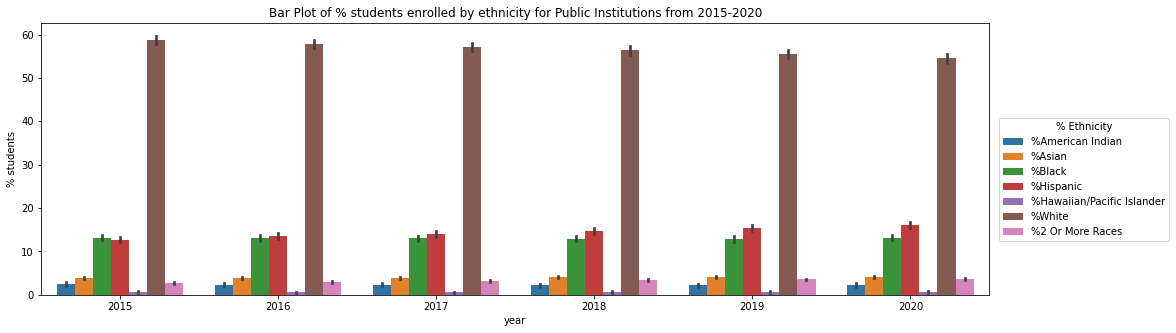

In [45]:
plt.figure(figsize=(17,5))
sns.barplot(x="year", y="% students", hue='race_type', data=public_race).set(title='Bar Plot of % students enrolled by ethnicity for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Ethnicity', borderaxespad=0)

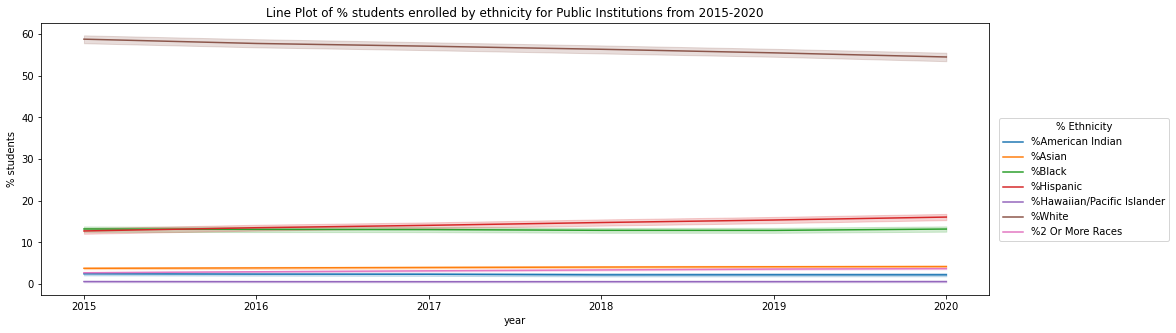

In [46]:
plt.figure(figsize=(17,5))
sns.lineplot(x="year", y="% students", hue='race_type', data=public_race).set(title='Line Plot of % students enrolled by ethnicity for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.65),loc='upper left', title='% Ethnicity', borderaxespad=0)

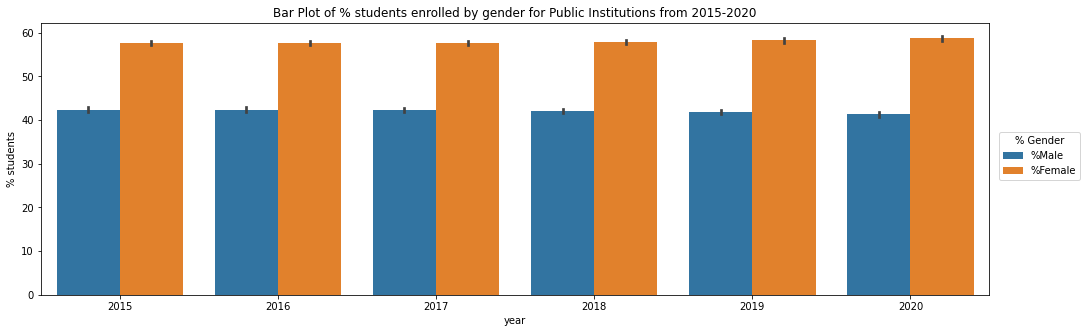

In [52]:
plt.figure(figsize=(17,5))
sns.barplot(x="year", y="% students", hue='gender_type', data=public_gender).set(title='Bar Plot of % students enrolled by gender for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.6),loc='upper left', title='% Gender', borderaxespad=0)

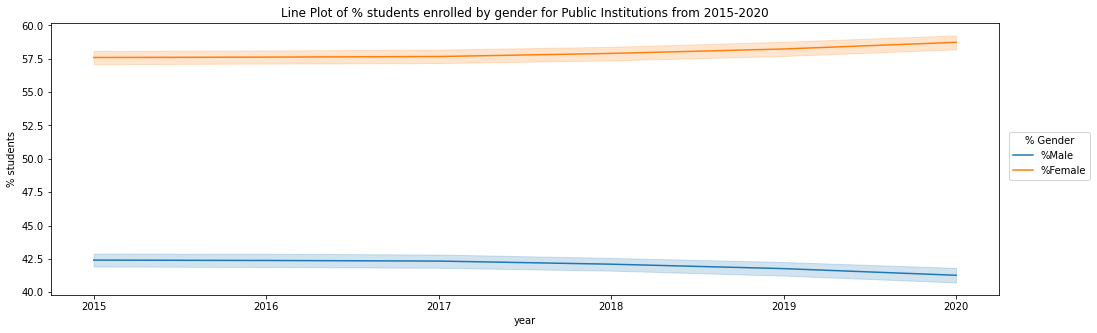

In [53]:
plt.figure(figsize=(17,5))
sns.lineplot(x="year", y="% students", hue='gender_type', data=public_gender).set(title='Line Plot of % students enrolled by gender for Public Institutions from 2015-2020')
plt.legend(bbox_to_anchor=(1.01, 0.6),loc='upper left', title='% Gender', borderaxespad=0)

In [ ]:
complete_set.columns

Index(['unitid', 'year', '%Male', '%Female', '%American Indian', '%Asian',
       '%Black', '%Hispanic', '%Hawaiian/Pacific Islander', '%White',
       '%2 Or More Races', '%Nonresident Alien', '%Men Graduated',
       '%Women Graduated', '%American Indian Graduated', '%Asian Graduated',
       '%Black Graduated', '%Hispanic Graduated',
       '%Hawaiian/Pacific Islander Graduated', '%White Graduated',
       '%2 or More Races Graduated', '%Nonresident Alien Graduated',
       '%US_male', '%US_female', '%US_White', '%US_Black',
       '%US_American Indian', '%US_Asian', '%US_Hawaiian/Pacific Islander',
       '%US_2 Or More Races', '%US_Hispanic'],
      dtype='object')

In [ ]:
gini = complete_set.loc[:, ['unitid','year','%Male','%Female','%US_male',	'%US_female','%American Indian', '%Asian', '%Black', '%Hispanic', '%Hawaiian/Pacific Islander', '%White',
       '%2 Or More Races','%US_White','%US_Black','%US_American Indian',	'%US_Asian',	'%US_Hawaiian/Pacific Islander',	'%US_2 Or More Races',	'%US_Hispanic']]
       

In [ ]:
gini.head()

,unitid,year,%Male,%Female,%US_male,%US_female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,%White,%2 Or More Races,%US_White,%US_Black,%US_American Indian,%US_Asian,%US_Hawaiian/Pacific Islander,%US_2 Or More Races,%US_Hispanic
0,100654,2020,0.385213,0.614787,0.495354,0.504646,0.002287,0.002134,0.868750,0.007774,0.000915,0.020122,0.010671,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
1,100663,2020,0.370545,0.629455,0.495354,0.504646,0.002206,0.060016,0.213907,0.042333,0.000193,0.580196,0.034671,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
2,100690,2020,0.391103,0.608897,0.495354,0.504646,0.004634,0.005561,0.615385,0.027804,0.001854,0.322521,0.000000,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
3,100706,2020,0.551273,0.448727,0.495354,0.504646,0.010078,0.035537,0.092291,0.049682,0.001856,0.684848,0.030675,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728
4,100724,2020,0.368750,0.631250,0.495354,0.504646,0.002155,0.003879,0.901078,0.010345,0.000862,0.042672,0.011422,0.638662,0.114142,0.011062,0.051412,0.002192,0.024801,0.157728


In [ ]:
gini['ratio_male'] = gini['%Male']/gini['%US_male']
gini['ratio_female'] = gini['%Female']/gini['%US_female']
gini['ratio_american_indian'] = gini['%American Indian']/gini['%US_American Indian']
gini['ratio_Asian'] = gini['%Asian']/gini['%US_Asian']
gini['ratio_Black'] = gini['%Black']/gini['%US_Black']
gini['ratio_Hispanic'] = gini['%Hispanic']/gini['%US_Hispanic']
gini['ratio_Hawaiian/Pacific Islander'] = gini['%Hawaiian/Pacific Islander']/gini['%US_Hawaiian/Pacific Islander']
gini['ratio_White'] = gini['%White']/gini['%US_White']
gini['ratio_2 Or More Races'] = gini['%2 Or More Races']/gini['%US_2 Or More Races']

In [ ]:
gini.head()

,unitid,year,%Male,%Female,%US_male,%US_female,%American Indian,%Asian,%Black,%Hispanic,...,%US_Hispanic,ratio_male,ratio_female,ratio_american_indian,ratio_Asian,ratio_Black,ratio_Hispanic,ratio_Hawaiian/Pacific Islander,ratio_White,ratio_2 Or More Races
0,100654,2020,0.385213,0.614787,0.495354,0.504646,0.002287,0.002134,0.868750,0.007774,...,0.157728,0.777653,1.218253,0.206699,0.041511,7.611166,0.049290,0.417243,0.031506,0.430251
1,100663,2020,0.370545,0.629455,0.495354,0.504646,0.002206,0.060016,0.213907,0.042333,...,0.157728,0.748041,1.247319,0.199380,1.167356,1.874051,0.268389,0.088261,0.908455,1.397953
2,100690,2020,0.391103,0.608897,0.495354,0.504646,0.004634,0.005561,0.615385,0.027804,...,0.157728,0.789542,1.206583,0.418889,0.108159,5.391418,0.176275,0.845572,0.504994,0.000000
3,100706,2020,0.551273,0.448727,0.495354,0.504646,0.010078,0.035537,0.092291,0.049682,...,0.157728,1.112887,0.889192,0.910995,0.691228,0.808570,0.314983,0.846880,1.072316,1.236852
4,100724,2020,0.368750,0.631250,0.495354,0.504646,0.002155,0.003879,0.901078,0.010345,...,0.157728,0.744417,1.250877,0.194820,0.075455,7.894389,0.065586,0.393264,0.066815,0.460559


In [ ]:
gini.columns

Index(['unitid', 'year', '%Male', '%Female', '%US_male', '%US_female',
       '%American Indian', '%Asian', '%Black', '%Hispanic',
       '%Hawaiian/Pacific Islander', '%White', '%2 Or More Races', '%US_White',
       '%US_Black', '%US_American Indian', '%US_Asian',
       '%US_Hawaiian/Pacific Islander', '%US_2 Or More Races', '%US_Hispanic',
       'ratio_male', 'ratio_female', 'ratio_american_indian', 'ratio_Asian',
       'ratio_Black', 'ratio_Hispanic', 'ratio_Hawaiian/Pacific Islander',
       'ratio_White', 'ratio_2 Or More Races'],
      dtype='object')

In [ ]:
gini_index = gini.loc[:,['ratio_male', 'ratio_female', 'ratio_american_indian', 'ratio_Asian',
       'ratio_Black', 'ratio_Hispanic', 'ratio_Hawaiian/Pacific Islander',
       'ratio_White', 'ratio_2 Or More Races']]

In [ ]:
gini_index.head()

,ratio_male,ratio_female,ratio_american_indian,ratio_Asian,ratio_Black,ratio_Hispanic,ratio_Hawaiian/Pacific Islander,ratio_White,ratio_2 Or More Races
0,0.777653,1.218253,0.206699,0.041511,7.611166,0.049290,0.417243,0.031506,0.430251
1,0.748041,1.247319,0.199380,1.167356,1.874051,0.268389,0.088261,0.908455,1.397953
2,0.789542,1.206583,0.418889,0.108159,5.391418,0.176275,0.845572,0.504994,0.000000
3,1.112887,0.889192,0.910995,0.691228,0.808570,0.314983,0.846880,1.072316,1.236852
4,0.744417,1.250877,0.194820,0.075455,7.894389,0.065586,0.393264,0.066815,0.460559


In [ ]:
gini_index=(gini_index-gini_index.min())/(gini_index.max()-gini_index.min())

In [ ]:
gini_index.head()

,ratio_male,ratio_female,ratio_american_indian,ratio_Asian,ratio_Black,ratio_Hispanic,ratio_Hawaiian/Pacific Islander,ratio_White,ratio_2 Or More Races
0,0.382862,0.614787,0.002194,0.001999,0.858925,0.007357,0.000832,0.020122,0.011571
1,0.368283,0.629455,0.002116,0.056221,0.211488,0.040059,0.000176,0.580196,0.037595
2,0.388715,0.608897,0.004446,0.005209,0.608425,0.026310,0.001687,0.322521,0.000000
3,0.547908,0.448727,0.009669,0.033290,0.091248,0.047013,0.001689,0.684848,0.033262
4,0.366499,0.631250,0.002068,0.003634,0.890886,0.009789,0.000784,0.042672,0.012386


In [ ]:
gini_index['Gini_gender'] = 1-(gini_index['ratio_male']**2 + gini_index['ratio_female']**2)

In [ ]:
gini_index['Gini_ethnics'] = 1-(gini_index['ratio_american_indian']**2 + gini_index['ratio_Asian']**2 + gini_index['ratio_Black']**2 + gini_index['ratio_Hispanic']**2 + gini_index['ratio_Hawaiian/Pacific Islander']**2 + gini_index['ratio_White']**2 + gini_index['ratio_2 Or More Races']**2)

In [ ]:
gini_index.head()

,ratio_male,ratio_female,ratio_american_indian,ratio_Asian,ratio_Black,ratio_Hispanic,ratio_Hawaiian/Pacific Islander,ratio_White,ratio_2 Or More Races,Gini_gender,Gini_ethnics
0,0.382862,0.614787,0.002194,0.001999,0.858925,0.007357,0.000832,0.020122,0.011571,0.475454,0.261646
1,0.368283,0.629455,0.002116,0.056221,0.211488,0.040059,0.000176,0.580196,0.037595,0.468154,0.612462
2,0.388715,0.608897,0.004446,0.005209,0.608425,0.026310,0.001687,0.322521,0.000000,0.478145,0.525058
3,0.547908,0.448727,0.009669,0.033290,0.091248,0.047013,0.001689,0.684848,0.033262,0.498441,0.518136
4,0.366499,0.631250,0.002068,0.003634,0.890886,0.009789,0.000784,0.042672,0.012386,0.467202,0.204233


In [ ]:
gini_index['year'] =gini['year']
gini_index['unitid'] =gini['unitid']

In [ ]:
gini_income = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/gini_income.csv")

In [ ]:
edu_fairness = pd.merge(gini_index, gini_income, on=['unitid', 'year'], how = 'left')

In [ ]:
edu_fairness.columns

Index(['ratio_male', 'ratio_female', 'ratio_american_indian', 'ratio_Asian',
       'ratio_Black', 'ratio_Hispanic', 'ratio_Hawaiian/Pacific Islander',
       'ratio_White', 'ratio_2 Or More Races', 'Gini_gender', 'Gini_ethnics',
       'year', 'unitid', 'Unnamed: 0', '% income level 1', '% income level 2',
       '% income level 3', '% income level 4', '% income level 5',
       '%US_Level 1', '%US_Level 2', '%US_Level 3', '%US_Level 4',
       '%US_Level 5', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5',
       'normalized_level_1', 'normalized_level_2', 'normalized_level_3',
       'normalized_level_4', 'normalized_level_5', 'Gini_income',
       'institution_type'],
      dtype='object')

In [ ]:
edu_fairness['edu_fairness_score'] = (edu_fairness['Gini_gender']+edu_fairness['Gini_ethnics']+edu_fairness['Gini_income'])/3

In [ ]:
edu_fairness = edu_fairness.loc[:,['year', 'unitid','Gini_gender','Gini_ethnics','Gini_income','edu_fairness_score','institution_type']]

In [ ]:
edu_fairness.head(-5)

,year,unitid,Gini_gender,Gini_ethnics,Gini_income,edu_fairness_score,institution_type
0,2020,100654,0.475454,0.261646,0.947475,0.561525,Public
1,2020,100663,0.468154,0.612462,0.955800,0.678806,Public
2,2020,100690,0.478145,0.525058,NaN,NaN,Private not-for-profit
3,2020,100706,0.498441,0.518136,0.960979,0.659185,Public
4,2020,100724,0.467202,0.204233,0.946293,0.539243,Public
...,...,...,...,...,...,...,...
40295,2015,487506,0.011878,0.248852,NaN,NaN,Private for-profit
40296,2015,487524,0.497033,0.286522,NaN,NaN,Private not-for-profit
40297,2015,487588,0.092608,0.410029,NaN,NaN,Private for-profit
40298,2015,487603,0.500583,0.687955,NaN,NaN,Private not-for-profit


In [ ]:
edu_fairness.to_csv('/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Final_Education_Fairness.csv')